# Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [5]:
%matplotlib inline

# Get the Data

In [6]:
cDf = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
                   # ,index_col=0)

cDf


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Deal with the Data

## Show dataframe shape

In [7]:
cDf.shape

(9134, 24)

## Standardize header names

***
**Pseudocode**

lower case every header

replace spaces with under score at every header

(... very tired copy paste and adapt it)
***

In [8]:
# Show the current headers
cDf.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
#['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
#       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
#       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
#       'Months Since Last Claim', 'Months Since Policy Inception',
#       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
#       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
#       'Vehicle Class', 'Vehicle Size', 'Vehicle Type']

### Define function standardHeader

In [10]:
def standardHeader(df):
    """Applies lower case and replaces blank spaces with under score"""

    new_header = []
    
    for h in df.columns:
        x = h.lower().replace(' ','_')
        new_header.append(x)

    df.columns = new_header
    display(df)
    #return new_header    
    

In [11]:
standardHeader(cDf)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Identify numerical and categorical variables

In [12]:
# Show all the data types
cDf.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

### Initial numerical features

In [13]:
cDf._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [14]:
# Try the other known method
cDf.select_dtypes([np.int_,np.float_])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
list(cDf.select_dtypes([np.int_,np.float_]).columns)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

### Initial categorical variables

In [16]:
cDf.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [17]:
list(cDf.select_dtypes('object').columns)

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [18]:
# I would say the column effective_to_date is not categorical is date_time

In [ ]:
# save the customer id

In [1]:
customer_id = cDf.customer
customer_id

NameError: name 'cDf' is not defined

## Dealing with NaN values

In [27]:
# Which are the possible ways to get NaN information ???

# Amount of NaN

In [19]:
cDf.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [20]:
cDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

There is no need to deal with the nan values

### NaN values

In [22]:
# get the headers of all the variables with NaN values and filter nan_df

nan_df = pd.DataFrame(cDf.isna().sum(), columns=['NaN'])

nanCols = list(nan_df[nan_df.NaN != 0].index)

#nanCols
nan_df.T[nanCols]


""
NaN


### Percentage of NaN

In [ ]:
# A function to check the percentage of NaN on every column


In [23]:
nan_df = pd.DataFrame(round(cDf[nanCols].isna().sum()/len(cDf),4)*100, columns=['percent_nan'])
nan_df.T

""
percent_nan


### Single unique value variable: vehicle_type 

In [24]:
# Analizar la columna vehicle_type
cDf.vehicle_type.value_counts()

AttributeError: 'DataFrame' object has no attribute 'vehicle_type'

In [21]:
# There is only one unique value in this variable... 
# but if we delete this column it will not be a problem
"""Consider a predictor variable that has a single unique value; we refer to this type of data 
as a zero variance predictor.
...
A model such as linear regression would find these data problematic and is likely to cause an 
error in the computations. In either case, these data have no information and can easily be
discarded.
(Max Kuhn)
"""

'Consider a predictor variable that has a single unique value; we refer to this type of data \nas a zero variance predictor.\n...\nA model such as linear regression would find these data problematic and is likely to cause an \nerror in the computations. In either case, these data have no information and can easily be\ndiscarded.\n(Max Kuhn)\n'

In [49]:
# Delete the column vehicle_type
cDf.drop('vehicle_type', axis=1,inplace=True)

In [50]:
cDf.shape

(10910, 24)

In [52]:
# Let's drop the vehicle_type out of nanCols list
nanCols = nanCols[:-1]
nanCols
# lst.remove()

['state',
 'response',
 'months_since_last_claim',
 'number_of_open_complaints',
 'vehicle_class',
 'vehicle_size']

### NaN variables Descriptive Analysis

In [ ]:
## What do I do with the other missing values?

In [58]:
cDf[nanCols].dtypes

state                         object
response                      object
months_since_last_claim      float64
number_of_open_complaints    float64
vehicle_class                 object
vehicle_size                  object
dtype: object

In [69]:
display(cDf[nanCols].describe().T)
nan_df.T[cDf[nanCols].describe().columns].T

,count,mean,std,min,25%,50%,75%,max
months_since_last_claim,10277.0,15.149071,10.080349,0.0,6.0,14.0,23.0,35.0
number_of_open_complaints,10277.0,0.384256,0.912457,0.0,0.0,0.0,0.0,5.0


,percent_nan
months_since_last_claim,5.8
number_of_open_complaints,5.8


In [70]:
display(cDf[nanCols].describe(include='object').T)
nan_df.T[cDf[nanCols].describe(include='object').columns].T

,count,unique,top,freq
state,10279,5,California,3552
response,10279,2,No,8813
vehicle_class,10288,6,Four-Door Car,5212
vehicle_size,10288,3,Medsize,7251


,percent_nan
state,5.78
response,5.78
vehicle_class,5.70
vehicle_size,5.70


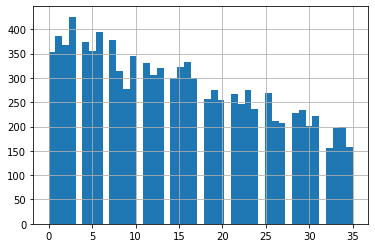

In [77]:
cDf.months_since_last_claim.hist(bins=45)
plt.show()

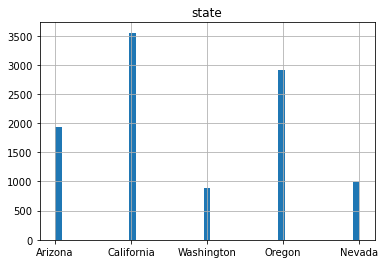

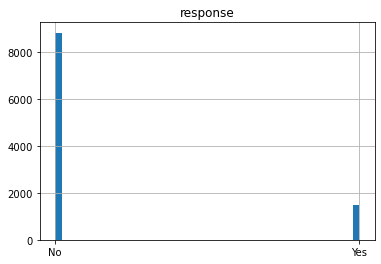

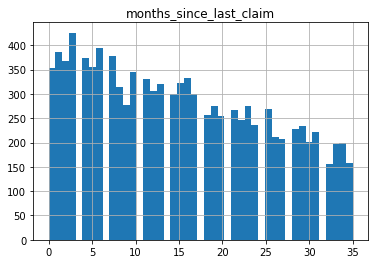

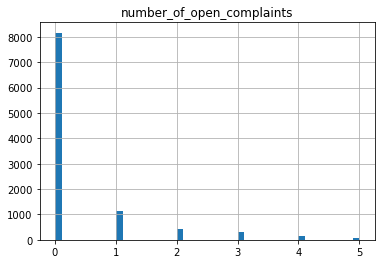

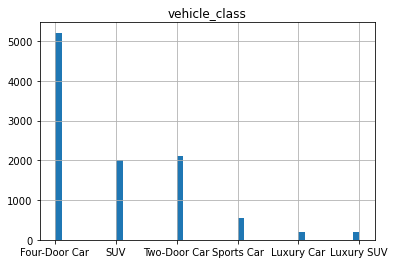

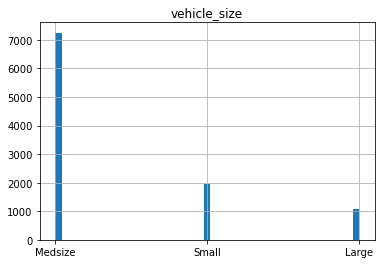

In [79]:
for v in nanCols:
    cDf[v].hist(bins=45)
    plt.title(v)
    plt.show()

In [ ]:
## What do I do with the NaN?

# State --> random (california, oregon)

# Response --> random or no

# Months since last --> mean

# Number of complaints --> mode: 0 ??? Is discrete

# Vehicle class --> random - # mode: Four - Door - Car

# vehicle class --> mode: Medsize


## ??? How to dertermine the distribution of a variable
## ??? How to control the probability of the randomness

In [86]:
# create a copy of the df until now to work with NaN
df2 = cDf.copy()
df2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [32]:
nanCols

NameError: name 'nanCols' is not defined

In [89]:
df2.state.fillna(np.random.choice(['California','Oregon']),inplace=True)


In [90]:
# 8813/10279

In [92]:
df2.response.fillna(np.random.choice(['No','Yes'], p=[8813/10279,1-8813/10279]),inplace=True)


In [93]:
df2.months_since_last_claim.fillna(np.mean(df2.months_since_last_claim),inplace=True)

In [94]:
df2.number_of_open_complaints.fillna(0,inplace=True)


In [95]:
df2.vehicle_class.value_counts()

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [96]:
df2.vehicle_class.fillna(np.random.choice(['Four-Door Car','SUV','Two-Door Car'], p=[5/9,2/9,2/9]),inplace=True)


In [97]:
df2.vehicle_size.fillna('Medsize',inplace=True)


In [ ]:
# If we wanted we could associate the vehicle size to the incomes or other categorical values
# What are we actually looking for?

In [98]:
# check NaN
df2.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Datetime data type

In [29]:
# Df2 == cDf without NaN values
df2 = cDf.copy()
df2.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [30]:
# df2.effective_to_date.value_counts()
df2.effective_to_date.head()

0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: effective_to_date, dtype: object

### Transform effective_to_date data type to datetime

In [31]:
# Change the data type of column effective to date and check the change
df2.effective_to_date = pd.to_datetime(df2.effective_to_date)
df2.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [32]:
df2.effective_to_date.head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

### Extract the months and store them in a separate column

In [33]:
df2['month'] = df2.effective_to_date.apply(lambda v: v.month)

# ???? Why I need to use lambda? Because month is a method?
# Pandas doesn't allow columns to be created via a new attribute name

In [34]:
df2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [21]:
# df2.rename(columns = {'months':'month'}, inplace = True)
# df2

### Filter the first quarter

In [35]:
df2[df2.month <= 3]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [36]:
df2.month.value_counts()

1    4898
2    4236
Name: month, dtype: int64

**All the months correspond to January or February**

# EDA - Exploratory Data Analysis

## Show info

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

## Describe

In [38]:
display(df2.describe())
#display(pd.DataFrame(df2.mode().iloc[0]).T)
#display(pd.DataFrame(df2.skew()).T)
#display(pd.DataFrame(df2.kurtosis()).T)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [ ]:
# total_claim_amount is the target

In [39]:
df2.describe(include='object')

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [ ]:
# customer is an id --> drop it

## Show a plot of the total number of responses.

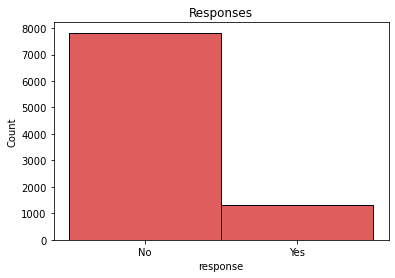

In [27]:
# Indeed a histogram or displot ought to work
f, ax = plt.subplots()
ax = sns.histplot(df2.response, color='tab:red')
plt.title('Responses')
plt.show()

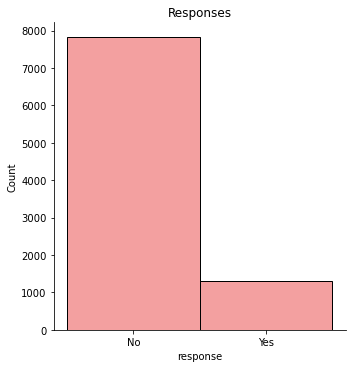

In [28]:
# Try with displot

# ??? Why displot does not work with plt.subplots ???
#f, ax = plt.subplots()
#ax = sns.displot(df2.response, color='tab:red')

sns.displot(df2.response, color='lightcoral')

plt.title('Responses')
plt.show()

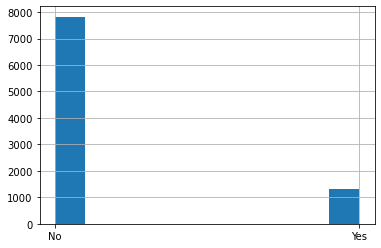

In [29]:
df2.response.hist()
plt.show()

## Show a plot of the response rate by the sales channel.

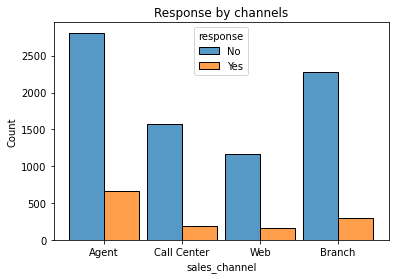

In [30]:
# 
sns.histplot(x='sales_channel', hue='response', data=df2, multiple='dodge', shrink=.9)
plt.title('Response by channels')
plt.show()

In [31]:
# ??? What is the problem with the colors of the labels

In [32]:
# ???? Why barplot does not work ???

#sns.barplot(hue='response',x='sales_channel', data=df2)
#plt.title('Response by channels')
#plt.show()

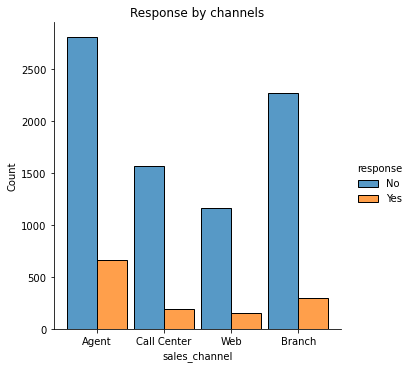

In [33]:
sns.displot(x='sales_channel', hue='response', data=df2, multiple='dodge', shrink=.9)
plt.title('Response by channels')
plt.show()

In [34]:
#sns.catplot(hue='sales_channel', x='response', data=df2, kind="bar") #, multiple='dodge', shrink=.9)
#plt.title('Response by channels')
#plt.show()

## Show a plot of the response rate by the total claim amount.

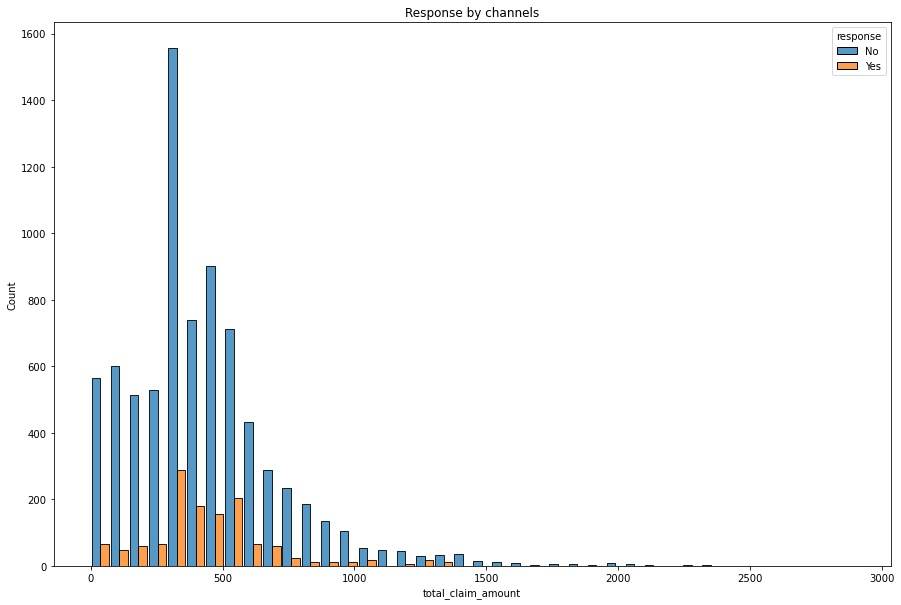

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(x='total_claim_amount', hue='response', data=df2, multiple="dodge", bins = 40, shrink = 0.9)
plt.title('Response by channels')
plt.show()

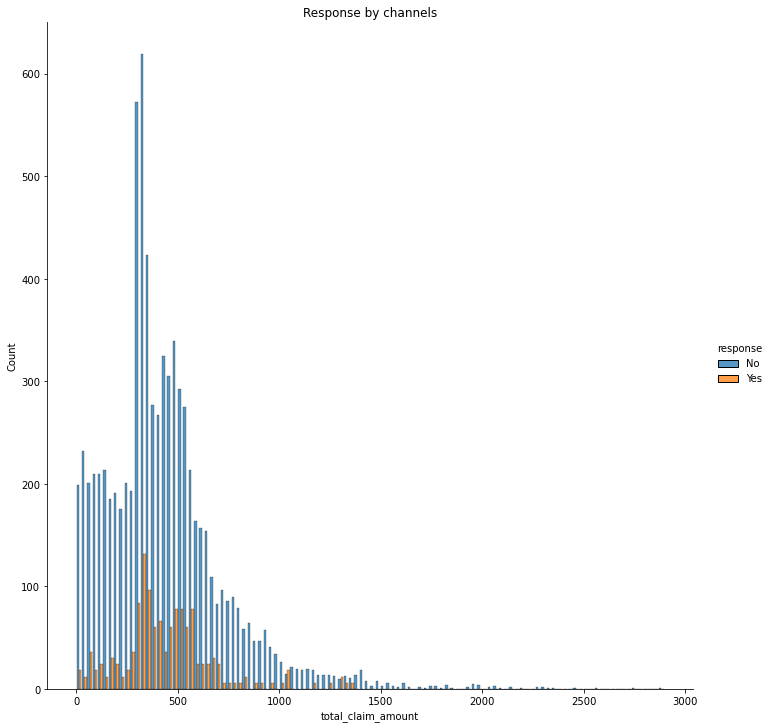

In [36]:

sns.displot(x='total_claim_amount', hue='response', data=df2, multiple = 'dodge', shrink = 0.9
            , height = 10, aspect=1) #.fig.set_dpi(100)
plt.title('Response by channels')
plt.show()

In [37]:
# UserWarning: `displot` is a figure-level function and does not accept the ax= paramter

## Show a plot of the response rate by income.

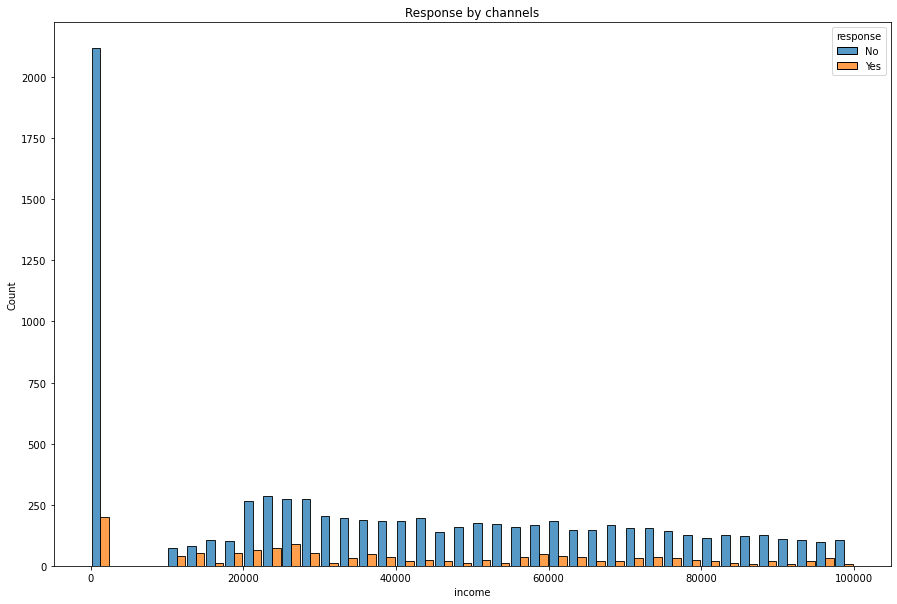

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(x='income', hue='response', data=df2, multiple="dodge", bins = 40, shrink = 0.9)
plt.title('Response by channels')
plt.show()

## Split numerical and categorical columns in a dataframes

In [40]:
df2.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [41]:
# Get the dataframes and show the heads
numerical = df2._get_numeric_data()
categorical = df2.select_dtypes(include='object')
display(numerical.head())
categorical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [42]:
# Get the columns of the new dataframes
numeVar = list(numerical.columns)
print(numeVar)
cateVar = list(categorical.columns)
print(cateVar)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'month']
['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


### Drop month column

Why I remove column month and not effective_to_date?  
  ??? What are datetime data types columns, numerical or categorical?

In [43]:
# The column month is categorical??
numeVar.remove('month')
numeVar

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [44]:
numerical.drop(columns='month', inplace=True)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

## Plot the NORMALITY of the numerical variables visually

### seaborn library to construct distribution plots for the numerical variables

#### with sns.histplot

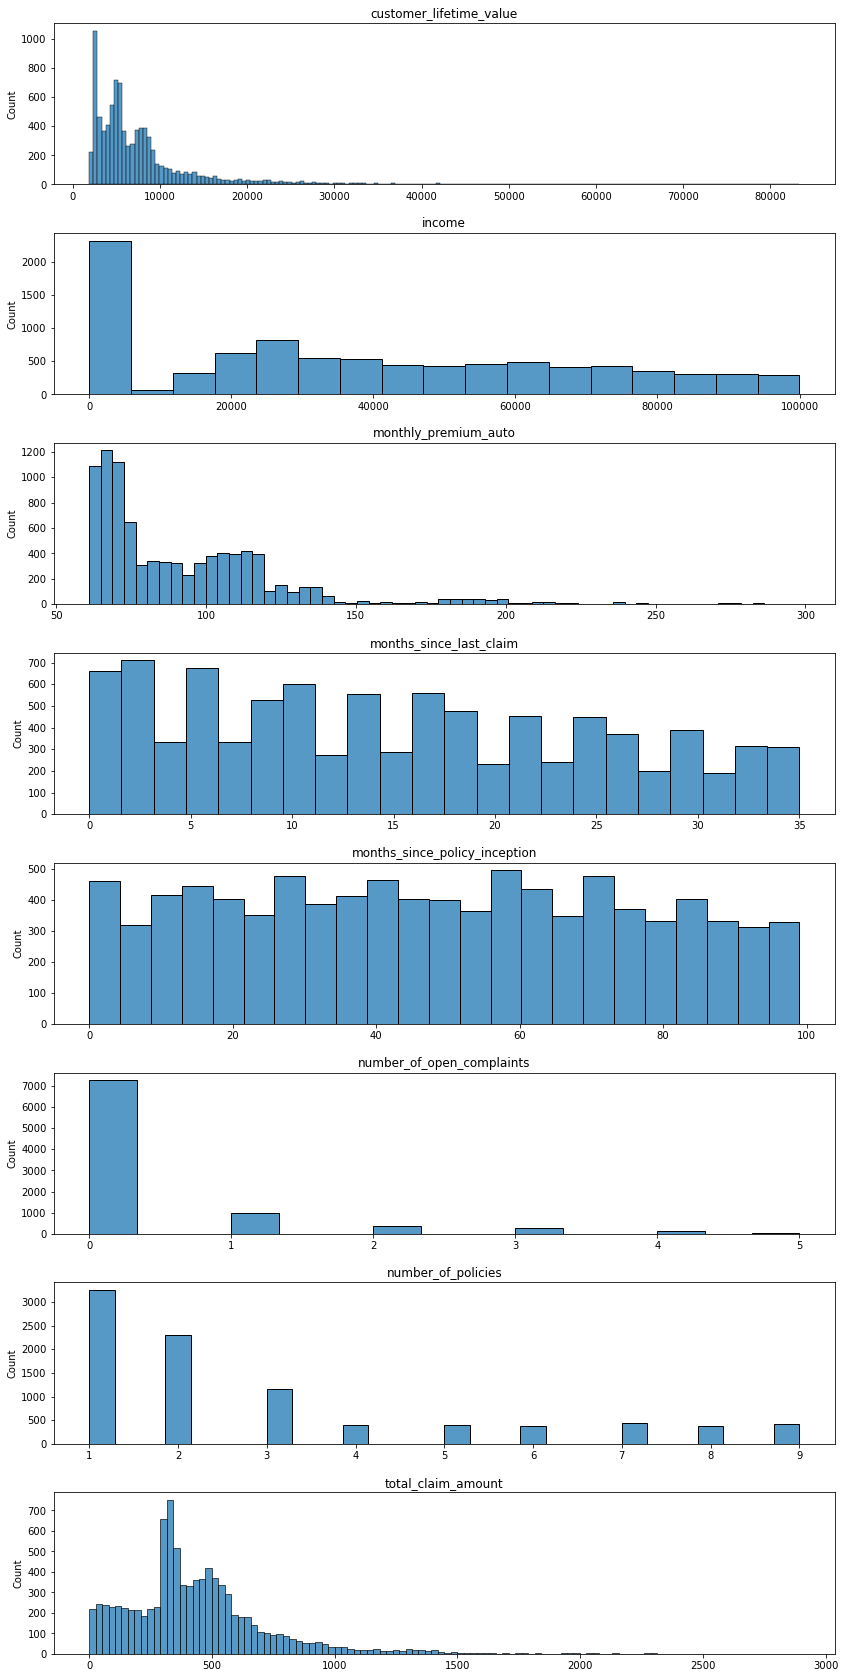

In [45]:
fig,ax = plt.subplots(len(numeVar),1,figsize=(14,30)) # (nrows, ncols) # ax becomes an array
# solved: Why i can't see the titles?
for i,v in enumerate(numeVar):
    sns.histplot(x= v, data=numerical, ax = ax[i])
    # plt.title(v)
    ax[i].set(title=v, xlabel=None)

# ERROR
# plt.subplot_tool() # ???? NonGuiException: Matplotlib is currently using 
# module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show 
# the figure.

plt.subplots_adjust(hspace=0.3)
plt.show()

#### with sns.displot

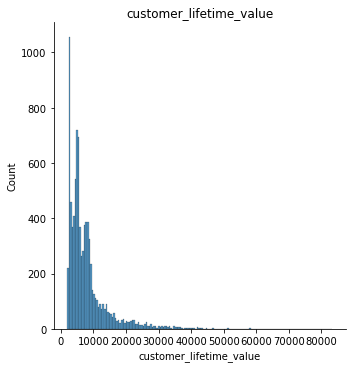

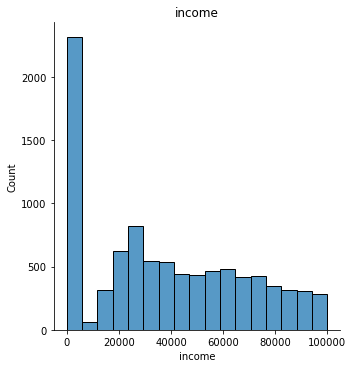

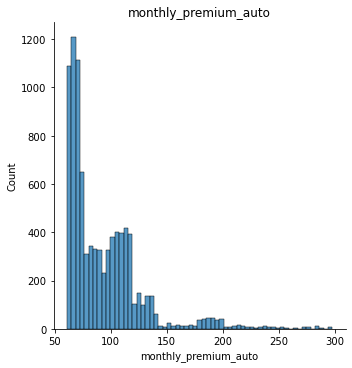

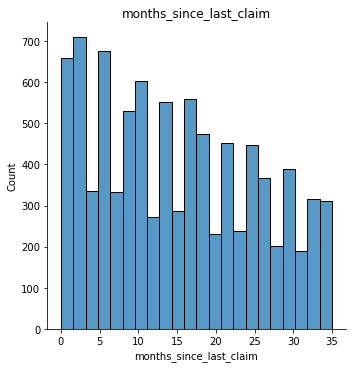

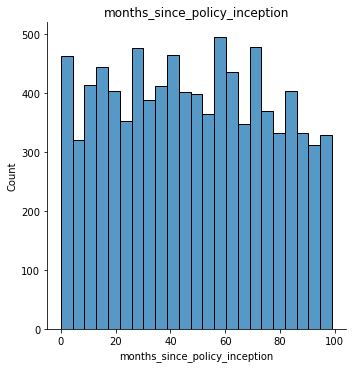

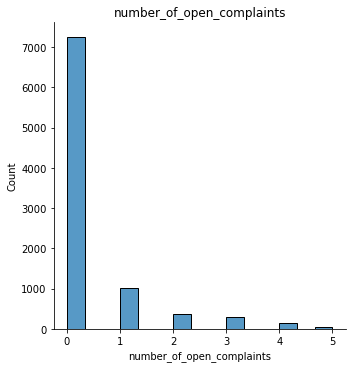

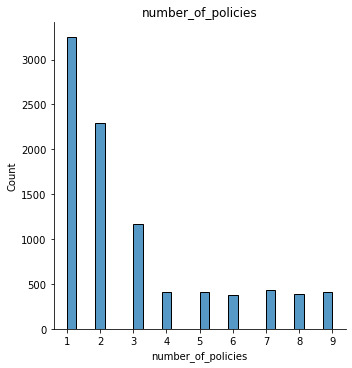

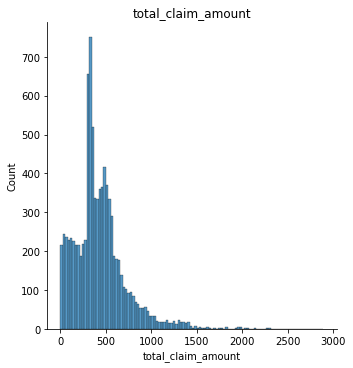

In [45]:
for v in numeVar:
    sns.displot(x=v, data=numerical)
                #, multiple = 'dodge', shrink = 0.9
                #, height = 10, aspect=1) #.fig.set_dpi(100)
    plt.title(v)
plt.show()

### Use Matplotlib to construct histograms

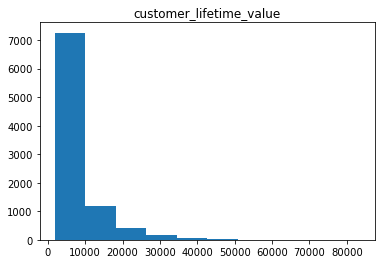

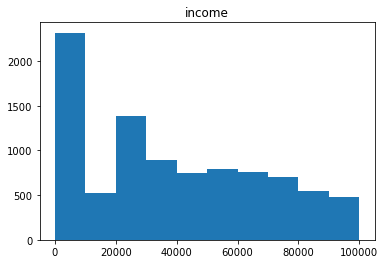

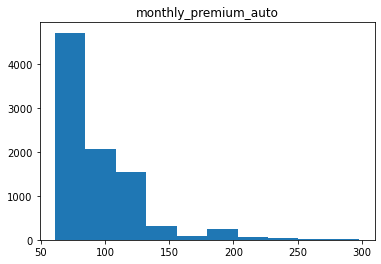

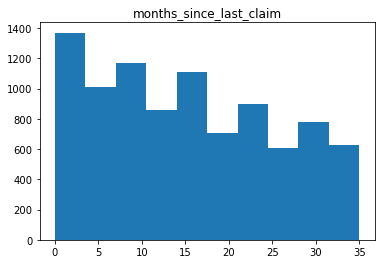

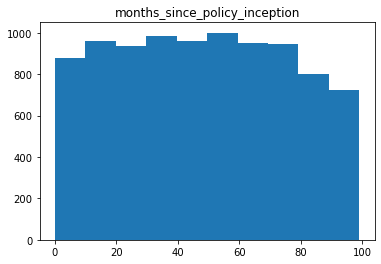

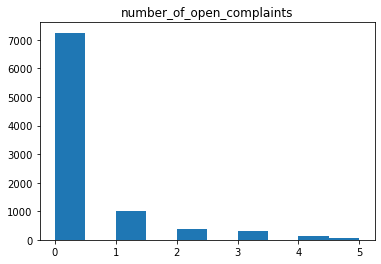

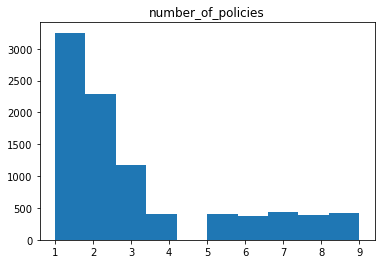

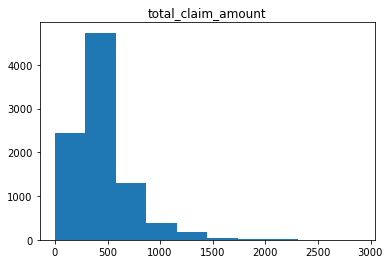

In [46]:
# f, ax = plt.subplots(len(numeVar),1)
for i,v in enumerate(numeVar):
    plt.hist(df2[v])
    plt.title(v)
    plt.show()

### Boxplot and histplot of the numerical variables 

Do the distributions for different numerical variables look like a normal distribution?

In [47]:
# Attempt to plot boxplot and histogram together

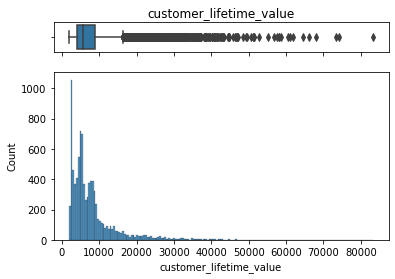

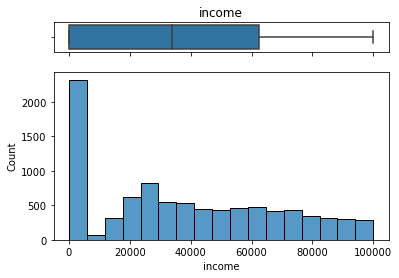

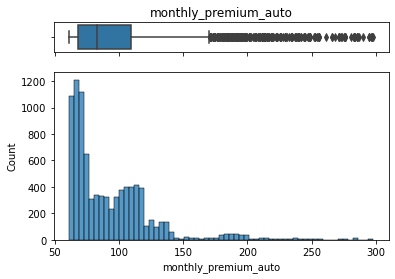

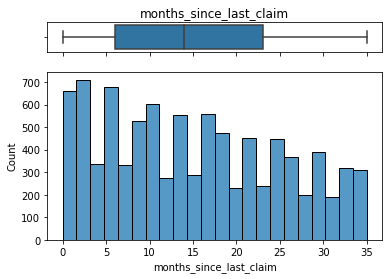

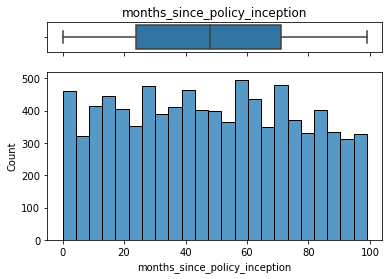

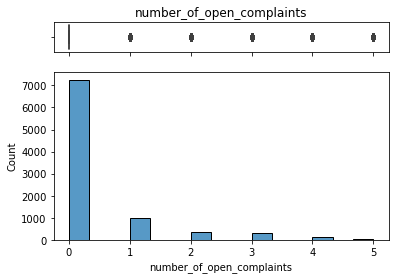

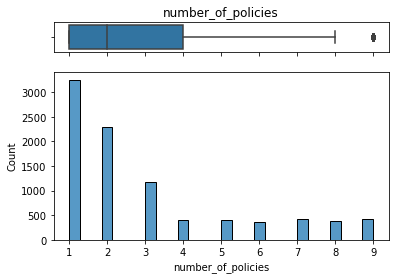

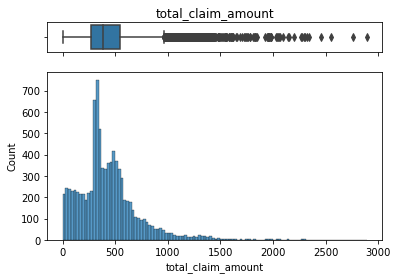

In [46]:
# fig,ax = plt.subplots(len(numeVar),1,figsize=(14,30)) # (nrows, ncols) # ax becomes an array
for v in numeVar:
    fig,ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)})
    sns.boxplot(x=numerical[v], ax=ax[0])
    sns.histplot(data=numerical, x=v, ax=ax[1])
    # sns.histplot(x= v, data=numerical, ax = ax[i])
    # plt.title(v)
    ax[0].set(title=v, xlabel=None)
    ax[1].set(title=None, xlabel=v)
    
    plt.show()



#plt.show()

### Pairplot of the numerical variables

<function matplotlib.pyplot.show(close=None, block=None)>

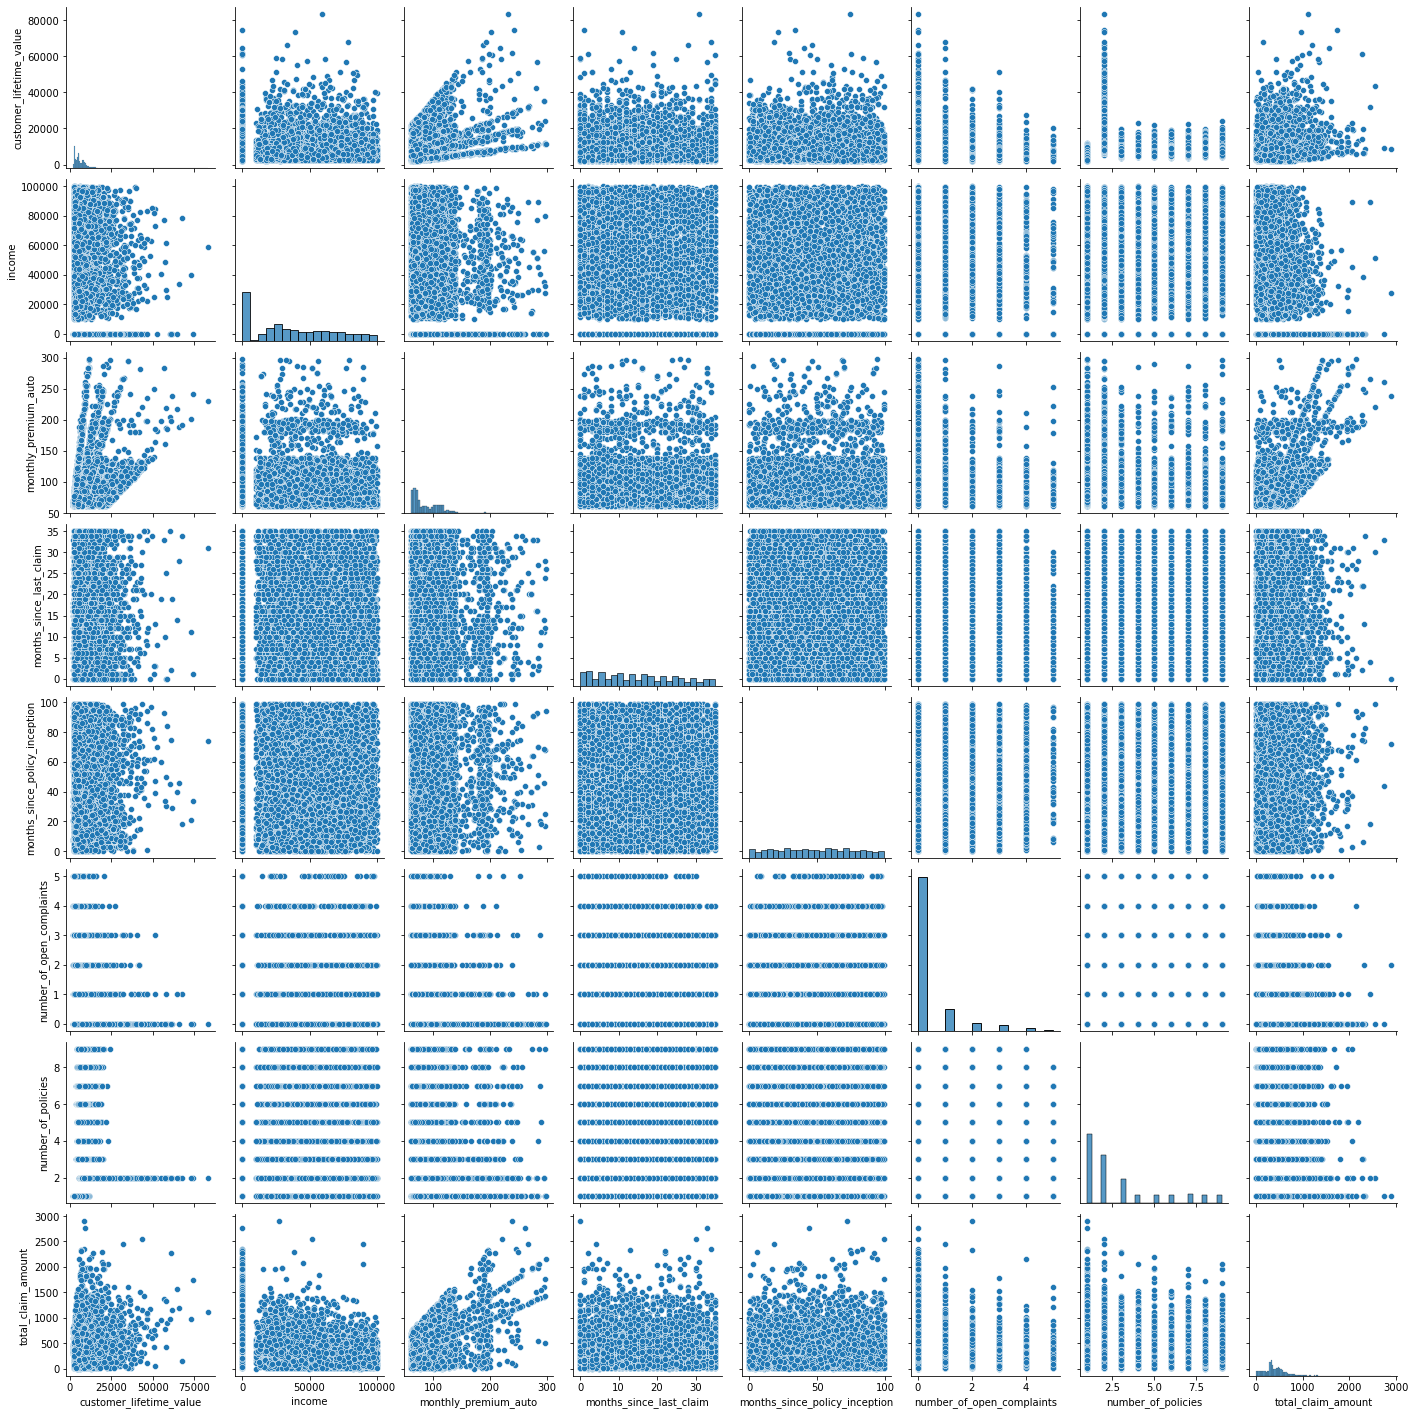

In [47]:
sns.pairplot(numerical)
plt.show()

# Study moments of the distributions

In [49]:
# Which variables am I going to transform?
# customer_lifetime_value
# monthly_premium_auto
# total_claim_amount

In [50]:
# Atempt to get the moments of a distribution

In [51]:
#x = numerical.customer_lifetime_value
#m,s = norm.fit(x)
#mean, var, skew, kur = norm.stats(m,s,moments='mvsk')
#print(mean, var, skew, kur)

8004.940474987081 47205027.25281359 0.0 0.0


In [53]:
#for v in numeVar:
    # x = numerical[v]
    # m,s = norm.fit(x)
    # mean, var, skew, kur = norm.stats(m,s,moments='mvsk')
#    mean, var, skew, kur = norm.stats(v,moments='mvsk')
#    print(v,mean, var, skew, kur)

In [49]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [51]:
# Try to define a function that returns the moments of the distributions
# get the mode, the median, the skewnes and kurtosis

#st_dev = numerical.std(axis=0)
#st_dev
mo = numerical.mode(axis=0)
#med = numerical.median()
skew = numerical.skew()
kur = numerical.kurtosis()
#display(st_dev)
print('Mode of the numerical Variables')
display(mo.iloc[0])       
#display(med)       
print('Skewness of the numerical Variables')
display(skew)
print('Kurtosis of the numerical Variables')
display(kur)

Mode of the numerical Variables


customer_lifetime_value          2004.350666
income                              0.000000
monthly_premium_auto               65.000000
months_since_last_claim             3.000000
months_since_policy_inception      59.000000
number_of_open_complaints           0.000000
number_of_policies                  1.000000
total_claim_amount                316.800000
Name: 0, dtype: float64

Skewness of the numerical Variables


customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        2.783263
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

Kurtosis of the numerical Variables


customer_lifetime_value          13.823533
income                           -1.094326
monthly_premium_auto              6.193605
months_since_last_claim          -1.073668
months_since_policy_inception    -1.133046
number_of_open_complaints         7.749308
number_of_policies                0.363157
total_claim_amount                5.979401
dtype: float64

### Filter columns to Log transform

In [57]:
# Filter the columns to Log transformed
# Criteria: skewness is not within [0,2]; All the values must be positive 
# --> Apply log transformation
# Criteria: skewness is not within [-2,2]; All the values are positive 
# --> Apply Box-Cox

# (In that case we do not find negative skewness)

var2norm = []
for i in skew.index:
    if skew[i] > 2:
        var2norm += [i]
var2norm

# Also check all the remaining criteria

['customer_lifetime_value',
 'monthly_premium_auto',
 'number_of_open_complaints']

In [60]:
# Create a copy for normalization and log data frames

In [59]:
# Create a copy for normalization data frames
numericLog = numerical.copy()
numericNorm = numerical.copy()

### Individual Log transformation

In [61]:
# Log transformation

# It is applied just to the columns that show relevant skewnees 
# We have already copied the numerical dataframe so we work over numericLog with var2norm list


for c in var2norm:
    #numericLog[c] = numericLog[c].apply(lambda x: np.log(x) if x != 0 else x)
    numericLog[c] = numericLog[c].apply(lambda x: np.log10(x) if x != 0 else x)

print('Skewness of the numerical Variables')
display(skew)
print('Skewness after Log Transformation')
display(numericLog.skew())


### ???? log(0) == inf --> What to do with 0 values??? else?

Skewness of the numerical Variables


customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        2.783263
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

Skewness after Log Transformation


customer_lifetime_value          0.575941
income                           0.286887
monthly_premium_auto             1.006154
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        3.228868
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

In [ ]:
# ??? Why the skewness of number_of_open_complaints has increased?

### Plot distributions before and after log transformations

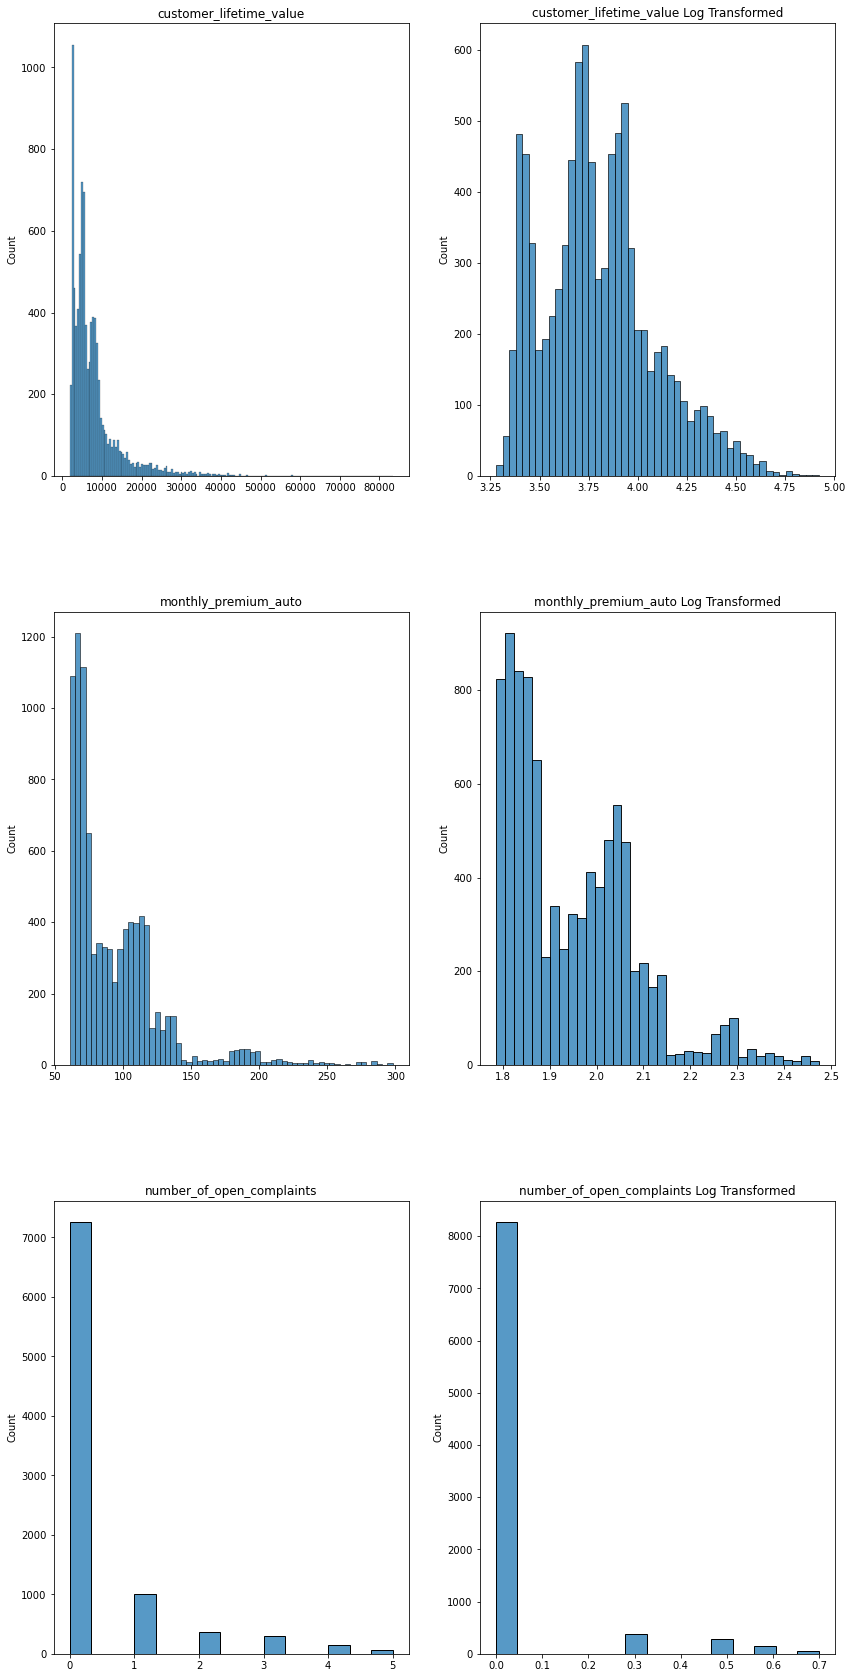

In [64]:
fig,ax = plt.subplots(len(var2norm),2,figsize=(14,30)) # (nrows, ncols) # ax becomes an array
# solved: Why i can't see the titles?
for i,v in enumerate(var2norm):
    sns.histplot(x= v, data=numerical, ax = ax[i,0])
    sns.histplot(x= v, data=numericLog, ax = ax[i,1])
    # plt.title(v)
    ax[i,0].set(title=v, xlabel=None)
    ax[i,1].set(title= "%s Log Transformed" %(v), xlabel=None)

# ERROR
# plt.subplot_tool() # ???? NonGuiException: Matplotlib is currently using 
# module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show 
# the figure.

plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
# note: log transformation, as well as box-cox, can only be applied to positive values (>= 0)

### Box - Cox transform and Yeo-Johnson introduction

Apply box-cox transform and compare to Log Transform

In [65]:
# Study the difference between normalization and standardization
# Try to identify more individual transformations

Alternatively, statistical methods can be used to empirically identify an appropriate transformation.  
Box and Cox (1964) propose a family of transformations^3^ that are indexed by a parameter, denoted as λ:


$$x^{*} = \{((xλ−1)/(λ)  if λ  = 0)  (log(x) if λ = 0) $$


In addition to the log transformation, this family can identify square transformation (λ = 2),  
square root (λ = 0.5), inverse (λ = −1), and others in-between. Using the training data, λ can be estimated

Some readers familiar with Box and Cox (1964) will know that this transformation
was developed for outcome data while Box and Tidwell (1962) describe similar methods
for transforming a set of predictors in a linear model. Our experience is that the
Box–Cox transformation is more straightforward, less prone to numerical issues, and
just as effective for transforming individual predictor variables

In [ ]:
# For the Box-Cox transformation would be possible to use the library scipy
# from scipy import stats
# xt, lmbda = stats.boxcox(data['IC1_'])
# sns.displot(xt)
# plt.show()

In [ ]:
# However I am going to use the PowerTransformer from scikit learn that also includes the
# Yeo-Johnson transform
"""Also note that even though Box-Cox seems to perform better than Yeo-Johnson for lognormal 
and chi-squared distributions, keep in mind that Box-Cox does not support inputs with negative values.
Scikit learn: map data to a normal distribution"""

### Standardization

In [ ]:
# To apply standardization return mean = 0 and std = 1.
# The normal distribution is a version of the standard distribution mean<>0 and area under the curve = 1.
# Applying the min-max scaler will do values to range from 0 - 1

In [65]:
# Try to apply the Standardrization by column

#for c in var2norm:
#    scaler = StandardScaler().fit(numericNorm[c])
#    numericNorm[c] = transformer.transform(numericNorm[c])
#numericNorm.skew()



# ???? ValueError: Expected 2D array, got 1D array instead:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or
# array.reshape(1, -1) if it contains a single sample.

# That error means that the scaler works with a whole data frame, for loop is not required.

ValueError: Expected 2D array, got 1D array instead:
array=[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
# Try to apply the Standardrization by column MANUALLY

for c in var2norm:
    mean = numericNorm[c].mean()
    std = numericNorm[c].std()
    numericNorm[c] = numericNorm[c].apply(lambda x: (x-mean)/std)
    
numericNorm.skew()
    

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.278586
months_since_policy_inception    0.040165
number_of_open_complaints        2.783263
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

In [69]:
numericNorm.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9.134000e+03,9134.000000,9.134000e+03,9134.000000,9134.000000,9.134000e+03,9134.000000,9134.000000
mean,8.245235e-16,37657.380009,-1.104206e-16,15.097000,48.064594,-2.035206e-16,2.966170,434.088794
std,1.000000e+00,30379.904734,1.000000e+00,10.073257,27.905991,1.000000e+00,2.390182,290.500092
min,-8.888024e-01,0.000000,-9.363904e-01,0.000000,0.000000,-4.222264e-01,1.000000,0.099007
25%,-5.837153e-01,0.000000,-7.329492e-01,6.000000,24.000000,-4.222264e-01,1.000000,272.258244
50%,-3.237911e-01,33889.500000,-2.970036e-01,14.000000,48.000000,-4.222264e-01,2.000000,383.945434
75%,1.393147e-01,62320.000000,4.586353e-01,23.000000,71.000000,-4.222264e-01,4.000000,547.514839
max,1.096213e+01,99981.000000,5.951549e+00,35.000000,99.000000,5.069964e+00,9.000000,2893.239678


In [ ]:
# ???? Why StanStandardrization by column does not seems to change skewness

In [ ]:
# Replot numericLog and numericNorm


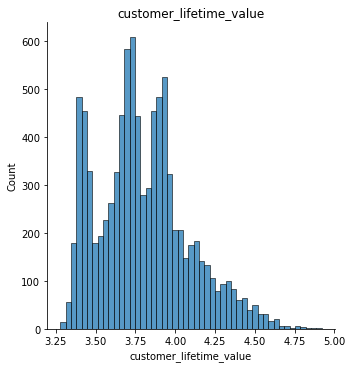

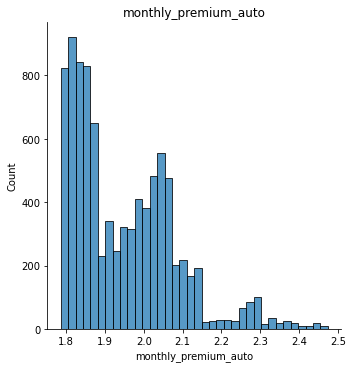

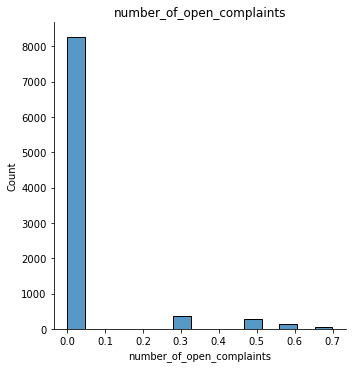

In [77]:
#numericLog - after applying log transform
for c in var2norm:
    sns.displot(x=c, data=numericLog)
            
    plt.title(c)
plt.show()

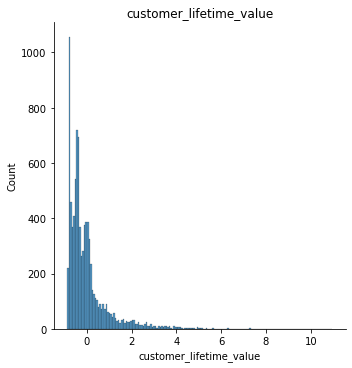

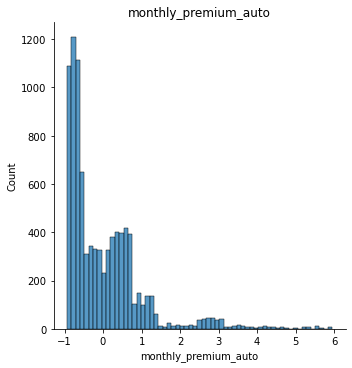

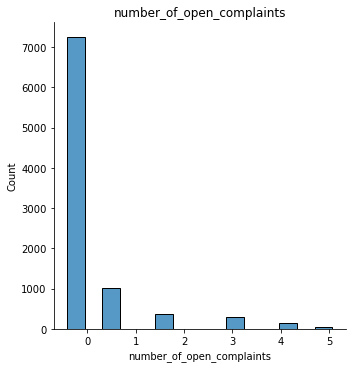

In [79]:
#numericNorm - after applying manual standardization
for c in var2norm:
    sns.displot(x=c, data=numericNorm)
                
    plt.title(c)
plt.show()

In [ ]:
# Try to plot the original and the transformations together:
# MinMaxScaler, StandardScaler, PowerTransformer, Log Transform, Manual Standardization and the original
# In that order:
#

## Plot correlation matrixes for the numerical variables,

In [ ]:
# ??? I am not sure to which dataframe to apply the correlation matrix
# It seems the correlations do not change when individual transformations like log or normalization
# are applied

### Log transformed correlation matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.041950,0.461225,0.009434,0.001310,-0.047576,0.195676,0.245374
income,0.041950,1.000000,-0.017724,-0.026715,-0.000875,0.006219,-0.008656,-0.355254
monthly_premium_auto,0.461225,-0.017724,1.000000,0.000913,0.018476,-0.014696,-0.010893,0.607220
months_since_last_claim,0.009434,-0.026715,0.000913,1.000000,-0.042959,0.002351,0.009136,0.007563
months_since_policy_inception,0.001310,-0.000875,0.018476,-0.042959,1.000000,0.004625,-0.013333,0.003335
number_of_open_complaints,-0.047576,0.006219,-0.014696,0.002351,0.004625,1.000000,0.004490,-0.008234
number_of_policies,0.195676,-0.008656,-0.010893,0.009136,-0.013333,0.004490,1.000000,-0.002354
total_claim_amount,0.245374,-0.355254,0.607220,0.007563,0.003335,-0.008234,-0.002354,1.000000


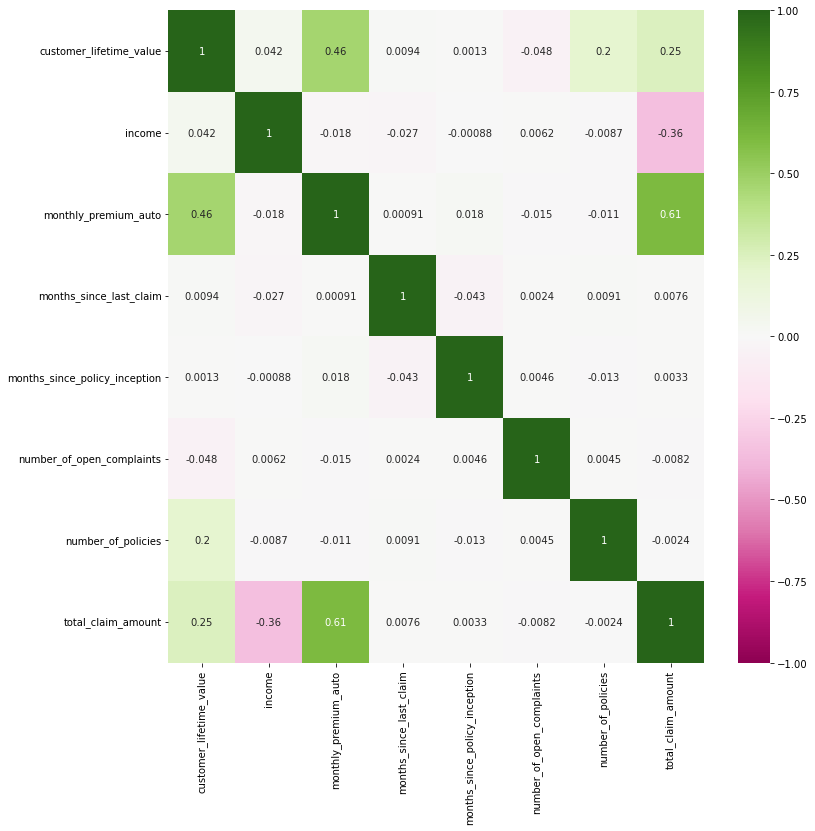

In [75]:
# Log transformed

corrLog = numericLog.corr()
display(corrLog)
plt.subplots(figsize=(12,12))
sns.heatmap(corrLog, annot=True, vmin=-1, vmax=1,cmap='PiYG')
plt.show()

### Manually Standardize Correlation Matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


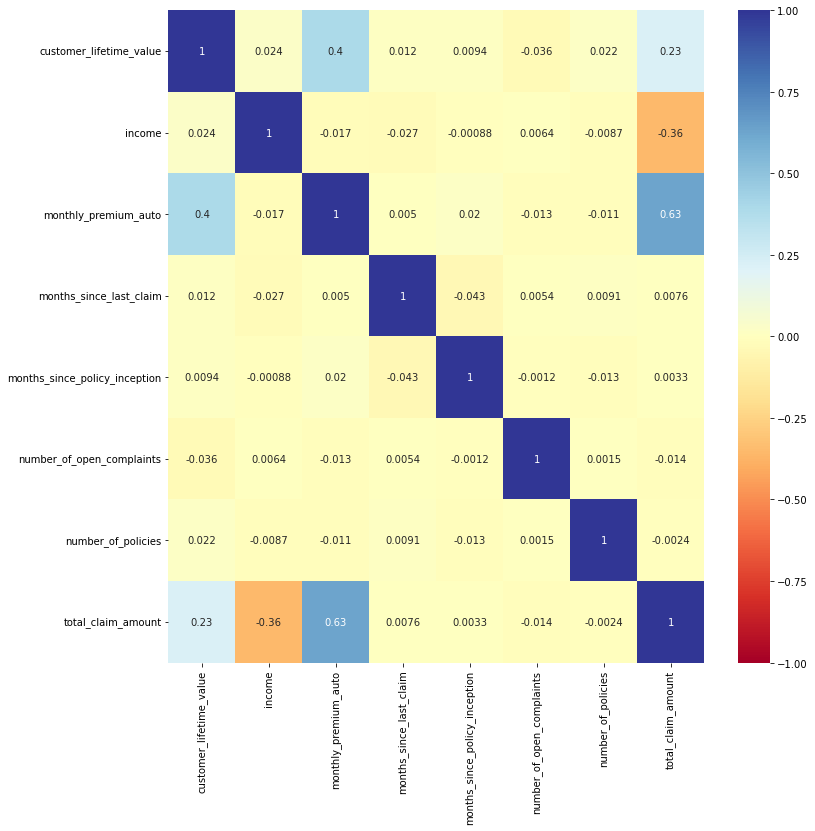

In [73]:
# Standarization transformed

corrNorm = numericNorm.corr()
display(corrNorm)
plt.subplots(figsize=(12,12))
sns.heatmap(corrNorm, annot=True, center=0, vmin=-1, vmax=1, cmap= 'RdYlBu') #'coolwarm') # 'PiYG')
plt.show()

ValueError: 'RdYIBu' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

### Original values correlation matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


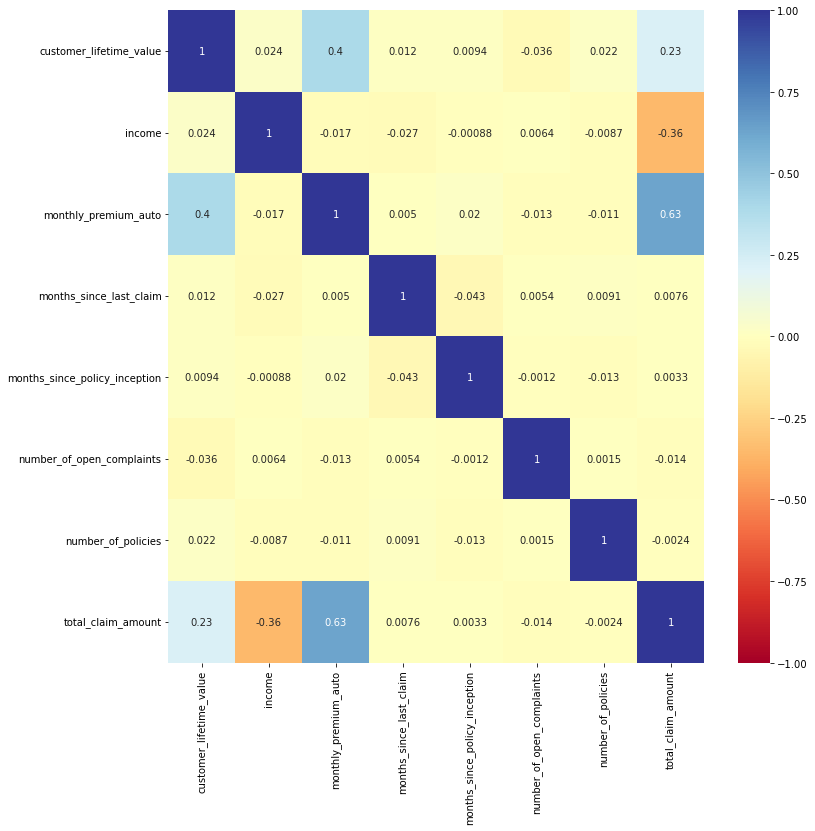

In [80]:
# Original

corr0 = numerical.corr()
display(corr0)
plt.subplots(figsize=(12,12))
sns.heatmap(corr0, annot=True, vmin=-1, vmax=1, cmap= 'RdYlBu')
plt.show()

In [ ]:
# There is no need to drop any feature because of multicollinearity

# Processing Data

In [ ]:
# Before comparing all the transformations with a plot I will apply the power transformer

# Target variable total_claim_amount

In [ ]:
# Recap the available dataframes and features

# cDf --> Original

# df2 --> Copy

# numerical (numeVar)
# categorical (cateVar)

# Study purposes:
# numericLog (var2norm)
# numericNorm


# At the moment I will only use numerical and categorical data frames

In [81]:
print(numerical.columns == numeVar)
numeVar

[ True  True  True  True  True  True  True  True]


['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [83]:
print(categorical.columns == cateVar)
print(cateVar)
categorical.head()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [84]:
# drop the customer feature
categorical.drop(columns='customer',inplace=True)
cateVar.remove('customer')
cateVar==categorical.columns

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
# ??? Which are the plots for the categorical variables in an EDA

## X-y split

In [ ]:
# The target feature must be sliced before the normalization

In [ ]:
# As I already have normalized a part of the data, I will only split y and continue working in the processing
# I will try, log transformation is just a lambda, if no, I will simplify and do it from the beginning. 

In [85]:
X = numerical.drop(columns='total_claim_amount')
y = numerical.total_claim_amount

## Train - test split

In [ ]:
# I will not be working with the categorical values
# I ought to have concat the processed categorical features

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Normalize (numerical)

In [ ]:
# ??? Which is the appropiate transformation for every model?

# ??? Should I apply the normalization to numericLog? --> I'd rather use power transform

# As the data must be consistent with the prediction set I will use ...

we fit the scalers and pre-processing transformers with the train numerical data frame

### MinMaxScaler normalization

In [88]:
# from sklearn.preprocessing import MinMaxScaler
mMScaler = MinMaxScaler().fit(X_train)
x_normalized = mMScaler.transform(X_train)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_train.columns)
x_normalized.head()

(7307, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.149638,0.000000,0.173729,0.485714,0.919192,0.0,0.125
1,0.076573,0.320335,0.038136,0.342857,0.585859,0.0,0.125
2,0.012717,0.000000,0.072034,0.628571,0.989899,0.0,0.000
3,0.003926,0.000000,0.016949,0.314286,0.696970,0.0,0.000
4,0.148867,0.317514,0.042373,0.285714,0.292929,0.0,0.125


### Standardization

In [91]:
# from sklearn.preprocessing import StandardScaler
stanScaler = StandardScaler().fit(X_train)
x_standardized = stanScaler.transform(X_train)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=X_train.columns)
x_standardized.head()

(7307, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.866245,-1.237436,0.252802,0.192204,1.541061,-0.419922,-0.405535
1,0.011557,-0.184303,-0.667703,-0.303783,0.356399,-0.419922,-0.405535
2,-0.735413,-1.237436,-0.437577,0.688191,1.792352,-0.419922,-0.823188
3,-0.838248,-1.237436,-0.811532,-0.402980,0.751286,-0.419922,-0.823188
4,0.857222,-0.193578,-0.638937,-0.502178,-0.684667,-0.419922,-0.405535


### Yeo - Johnson PowerTransformer normalization

In [92]:
ptScaler = PowerTransformer().fit(X_train)
x_powered = ptScaler.transform(X_train)
print(x_powered.shape)
x_powered = pd.DataFrame(x_powered,columns=X_train.columns)
x_powered.head()

(7307, 7)


/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.0,-1.636927,0.694100,0.334981,1.415456,-0.506618,-0.060109
1,0.0,0.341575,-0.767951,-0.134121,0.423932,-0.506618,-0.060109
2,0.0,-1.636927,-0.261368,0.747407,1.611347,-0.506618,-1.148235
3,0.0,-1.636927,-1.164643,-0.237331,0.768993,-0.506618,-1.148235
4,0.0,0.336488,-0.696845,-0.344544,-0.595687,-0.506618,-0.060109


### Box - Cox PowerTransformer normalization

In [96]:
bcTransformer = PowerTransformer(method = 'box-cox').fit(X_train)
x_boxcox = bcTransformer.transform(X_train)
print(x_boxcox.shape)
x_powered = pd.DataFrame(x_boxcox,columns=X_train.columns)
x_powered.head()

# ValueError: The Box-Cox transformation can only be applied to strictly positive data

ValueError: The Box-Cox transformation can only be applied to strictly positive data

### Plot scaler and transformers

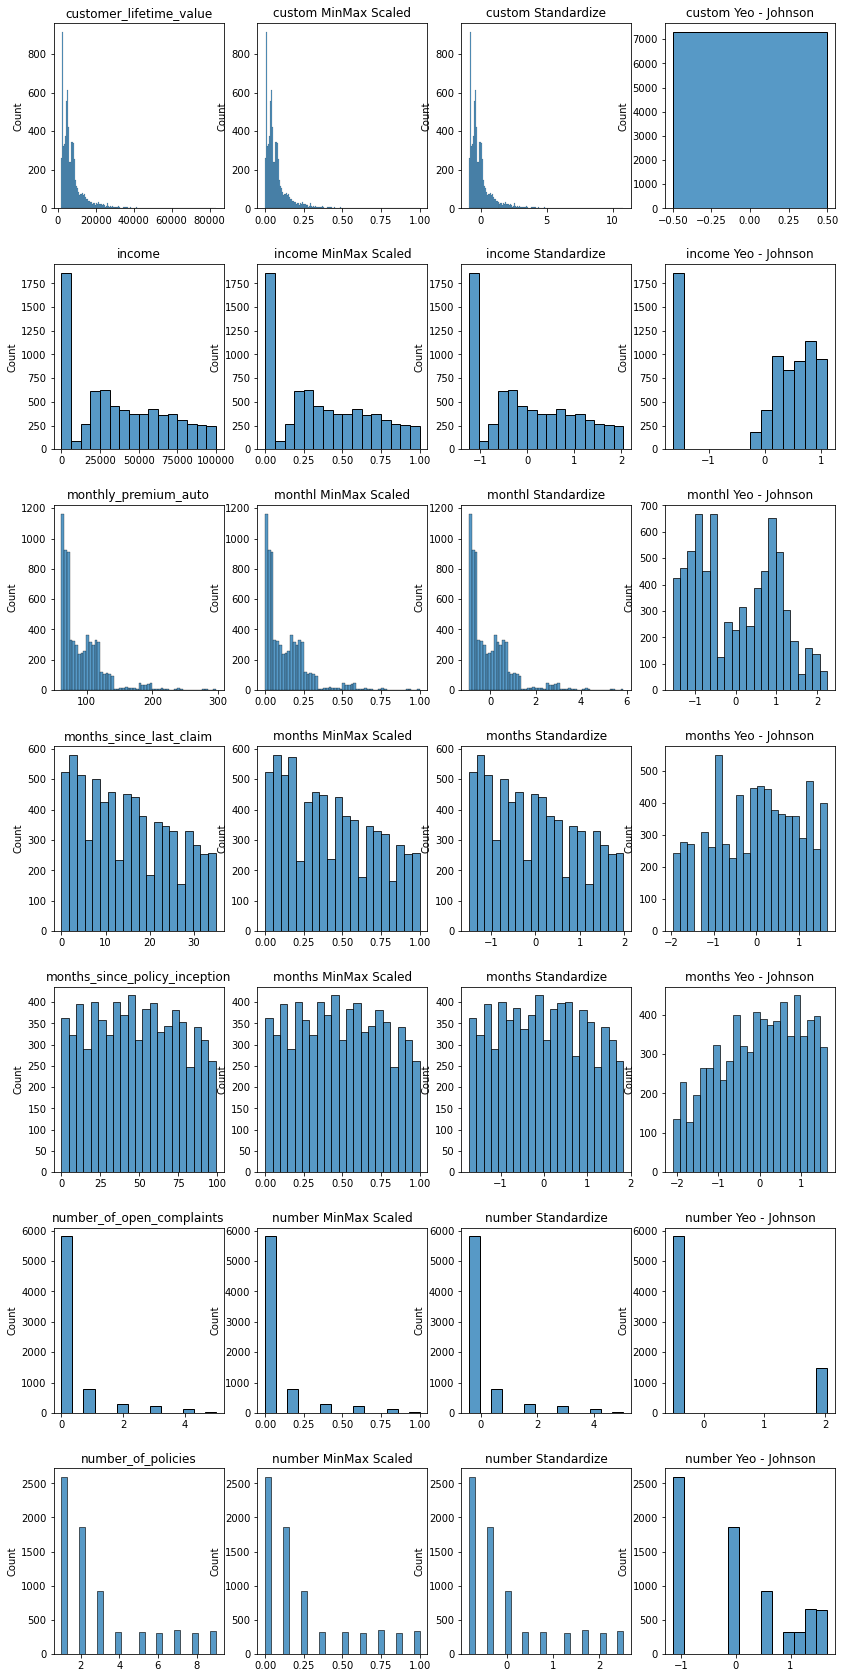

In [95]:
fig,ax = plt.subplots(len(X_train.columns),4,figsize=(14,30)) # (nrows, ncols) # ax becomes an array
for i,v in enumerate(list(X_train.columns)):
    sns.histplot(x= v, data=X_train, ax = ax[i,0])
    sns.histplot(x= v, data=x_normalized, ax = ax[i,1])
    sns.histplot(x= v, data=x_standardized, ax = ax[i,2])
    sns.histplot(x= v, data=x_powered, ax = ax[i,3])

    ax[i,0].set(title=v, xlabel=None)
    ax[i,1].set(title= "%s MinMax Scaled" %(v[:6]), xlabel=None)
    ax[i,2].set(title= "%s Standardize" %(v[:6]), xlabel=None)
    ax[i,3].set(title= "%s Yeo - Johnson" %(v[:6]), xlabel=None)

plt.subplots_adjust(hspace=0.3)
plt.show()